In [1]:
#Kmeans
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c='blue',marker='x',s=50)

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)

In [5]:
#Kmeans++
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)

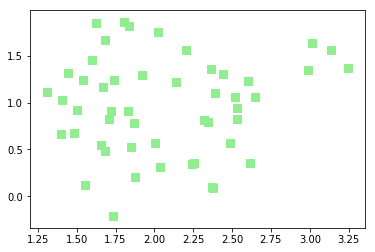

In [6]:
plt.scatter(X[y_km==0,0],X[y_km ==0,1],s=50,c='lightgreen',marker='s',label='cluster 1')

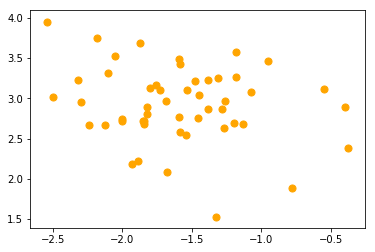

In [7]:
plt.scatter(X[y_km ==1,0],X[y_km ==1,1],s=50,c='orange',marker='o',label='cluster 2')

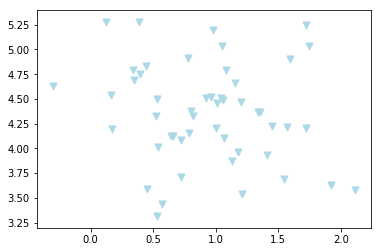

In [8]:
plt.scatter(X[y_km ==2,0],X[y_km ==2,1],s=50,c='lightblue',marker='v',label='cluster 3')

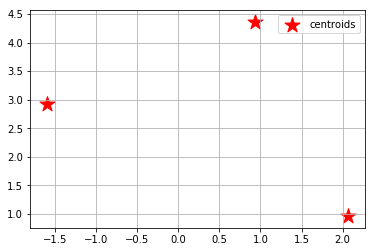

In [9]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red',label='centroids')
plt.legend()
plt.grid()
plt.show()

In [10]:
#Elbow Method
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


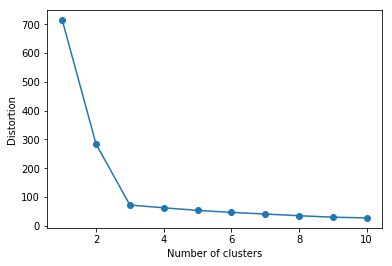

In [11]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [12]:
#Silhoute
km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)

In [13]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')

In [14]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []

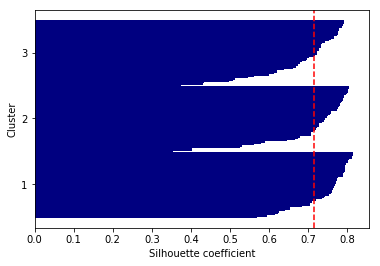

In [15]:
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
color="red",
linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()